In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

from stats import *
from sentiment_stats import *

from peewee import SQL
from database.models import RawFacebookComments, RawTwitterComments, RawInstagramComments, RawYouTubeComments, RawHashtagComments

rede_social = 'Twitter'
modelo = RawTwitterComments

cores = ['#FFA726', '#66BB6A', '#42A5F5', '#FFEE58', '#EF5350', '#AB47BC', '#C8C8C8']
cores2 = ['#FFA726', '#AB47BC', '#FFEE58', '#C8C8C8', '#EF5350', '#66BB6A', '#42A5F5']
cores_val = ['#EF5350', '#C8C8C8', '#66BB6A']
cores_val2 = ['#66BB6A', '#EF5350', '#C8C8C8']
sentimentos = ['ALEGRIA', 'SURPRESA', 'TRISTEZA', 'MEDO', 'RAIVA', 'DESGOSTO', 'NEUTRO']
valencia = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

valencia_dict = OrderedDict()
for val in valencia:
    valencia_dict[val] = 0

sentimentos_dict = OrderedDict()
for sentimento in sentimentos:
    sentimentos_dict[sentimento] = 0
    
default_clause = [
    SQL('length(clean_comment) > 0'),
]

positivo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO"')
]

negativo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO"')
]

neutro_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("NEUTRO") AND valence = "NEUTRO"')
]

general = default_clause + [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL("""
        (emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO") 
        OR 
        (emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO")
        OR
        (emotion in ("NEUTRO") AND valence = "NEUTRO")
    """)
]

### Emoções gerais dos comentários : Facebook

In [2]:
total_comentarios = modelo.select() \
        .where(default_clause) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general)) \
        .order_by(modelo.timestamp)

In [3]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Twitter:
--------------------
Total de Comentários  : 120082
Comentários Positivos : 23507
Comentários Negativos : 30871
Comentários Neutros   : 1561

Porcentagem de comentários:
--------------------
Comentários Positivos : 19.58%
Comentários Negativos : 25.71%
Comentários Neutros   : 1.3%
Total                 : 46.58%


#### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,23507,30871,1561


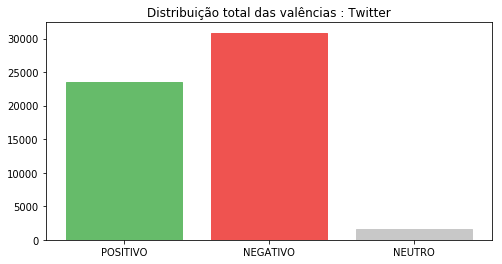

In [4]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

#### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,23233,274,28162,22,185,2502,1561


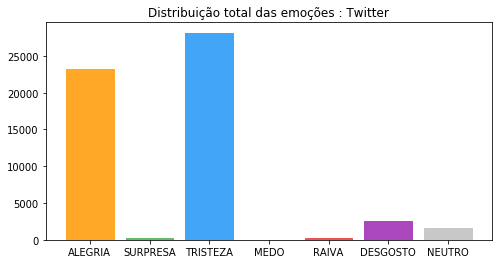

In [5]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Comentários por data : Valência

,12/03/2018,13/03/2018,14/03/2018,17/03/2018,29/04/2018,30/04/2018,01/05/2018,03/06/2018
NEGATIVO,4,2,0,0,9,3,1,0
NEUTRO,0,0,0,0,0,1,0,0
POSITIVO,11,3,2,1,8,1,2,1


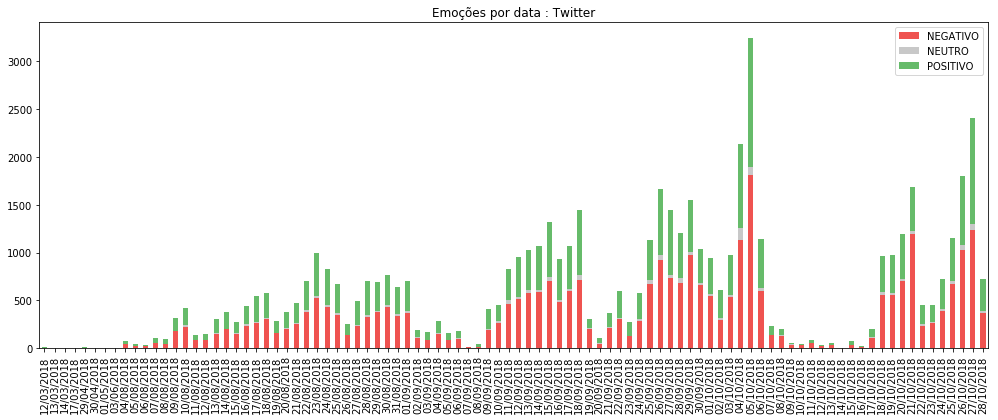

In [6]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

#### Comentários por data : Emoções

,12/03/2018,13/03/2018,14/03/2018,17/03/2018,29/04/2018,30/04/2018,01/05/2018,03/06/2018
ALEGRIA,11,3,2,1,8,0,2,1
DESGOSTO,1,0,0,0,0,0,0,0
MEDO,0,0,0,0,0,0,0,0
NEUTRO,0,0,0,0,0,1,0,0
RAIVA,0,0,0,0,0,0,0,0
SURPRESA,0,0,0,0,0,1,0,0
TRISTEZA,3,2,0,0,9,3,1,0


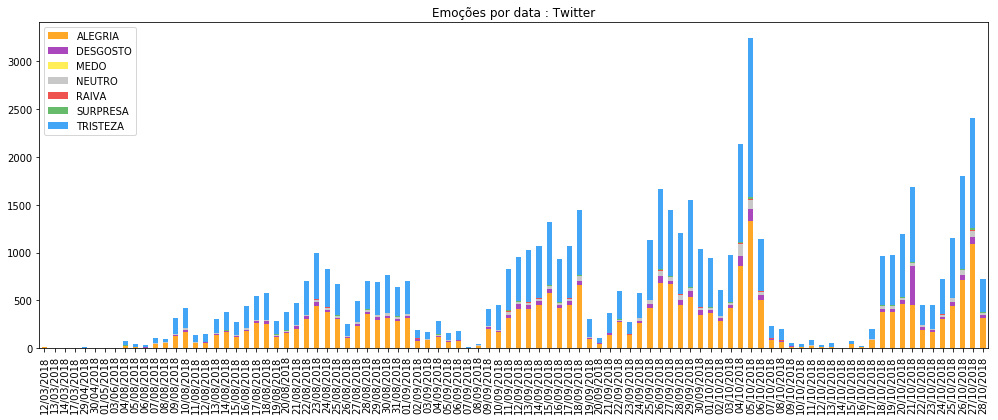

In [7]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

### Emoções por candidato : Facebook

#### Jair Bolsonaro

In [8]:
candidato_c = [modelo.candidate == 'Jair Bolsonaro']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [9]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Twitter:
--------------------
Total de Comentários  : 32712
Comentários Positivos : 6834
Comentários Negativos : 8476
Comentários Neutros   : 358

Porcentagem de comentários:
--------------------
Comentários Positivos : 20.89%
Comentários Negativos : 25.91%
Comentários Neutros   : 1.09%
Total                 : 47.9%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,6834,8476,358


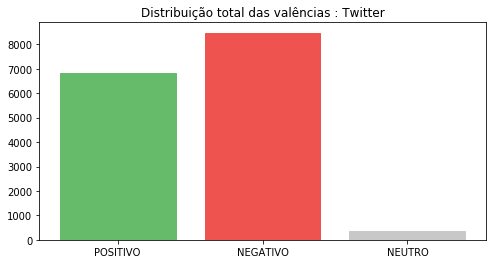

In [10]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,6767,67,7499,4,32,941,358


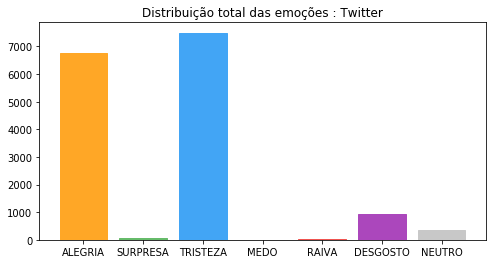

In [11]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,12/03/2018,13/03/2018,14/03/2018,17/03/2018,29/04/2018,30/04/2018,01/05/2018,03/06/2018
NEGATIVO,4,2,0,0,9,3,1,0
NEUTRO,0,0,0,0,0,1,0,0
POSITIVO,11,3,2,1,8,1,2,1


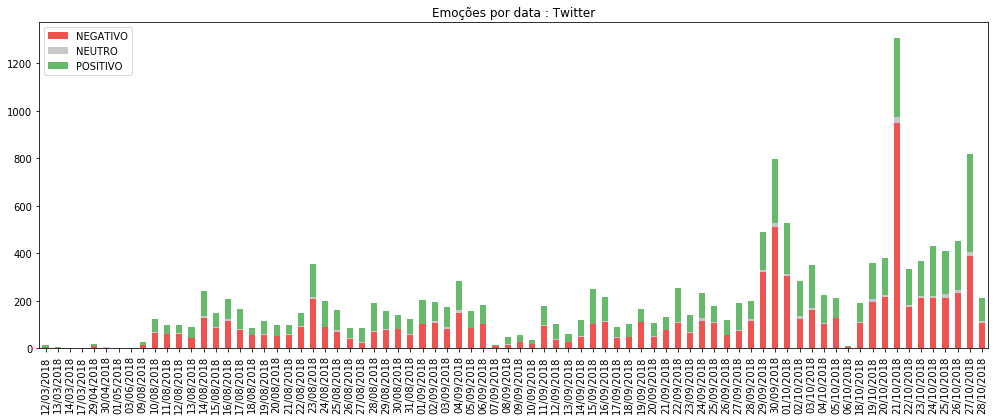

In [12]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,12/03/2018,13/03/2018,14/03/2018,17/03/2018,29/04/2018,30/04/2018,01/05/2018,03/06/2018
ALEGRIA,11,3,2,1,8,0,2,1
DESGOSTO,1,0,0,0,0,0,0,0
MEDO,0,0,0,0,0,0,0,0
NEUTRO,0,0,0,0,0,1,0,0
RAIVA,0,0,0,0,0,0,0,0
SURPRESA,0,0,0,0,0,1,0,0
TRISTEZA,3,2,0,0,9,3,1,0


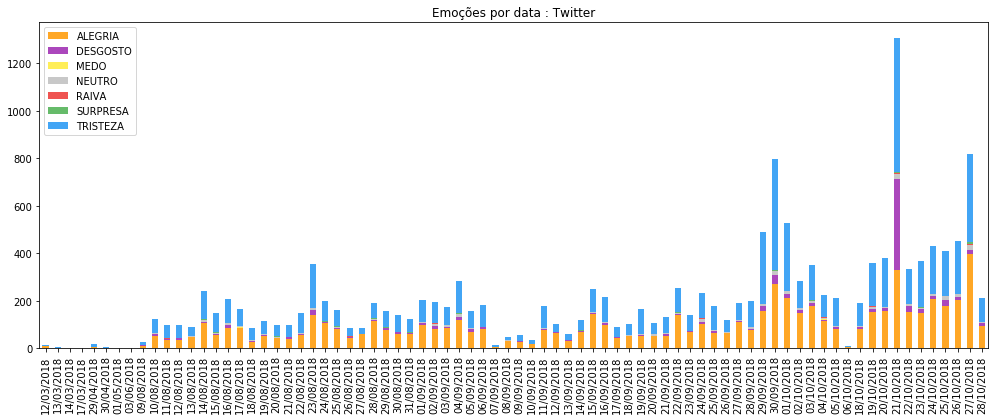

In [13]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Fernando Haddad

In [14]:
candidato_c = [modelo.candidate == 'Fernando Haddad']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [15]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Twitter:
--------------------
Total de Comentários  : 31760
Comentários Positivos : 5858
Comentários Negativos : 7777
Comentários Neutros   : 583

Porcentagem de comentários:
--------------------
Comentários Positivos : 18.44%
Comentários Negativos : 24.49%
Comentários Neutros   : 1.84%
Total                 : 44.77%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,5858,7777,583


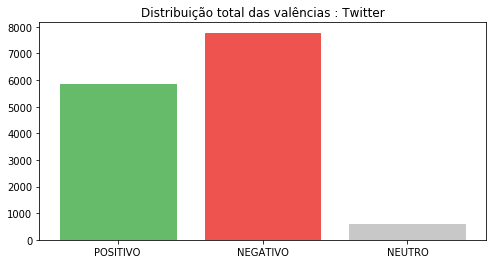

In [16]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,5777,81,7243,4,46,484,583


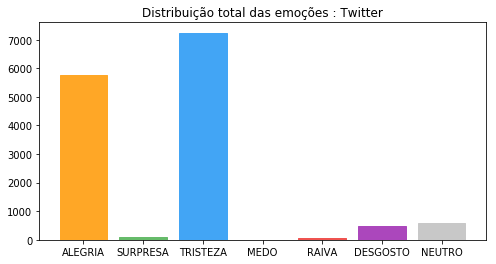

In [17]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,21/08/2018,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018
NEGATIVO,40,182,183,179,93,7,22,64
NEUTRO,2,5,11,11,3,0,3,9
POSITIVO,28,140,177,179,90,11,37,46


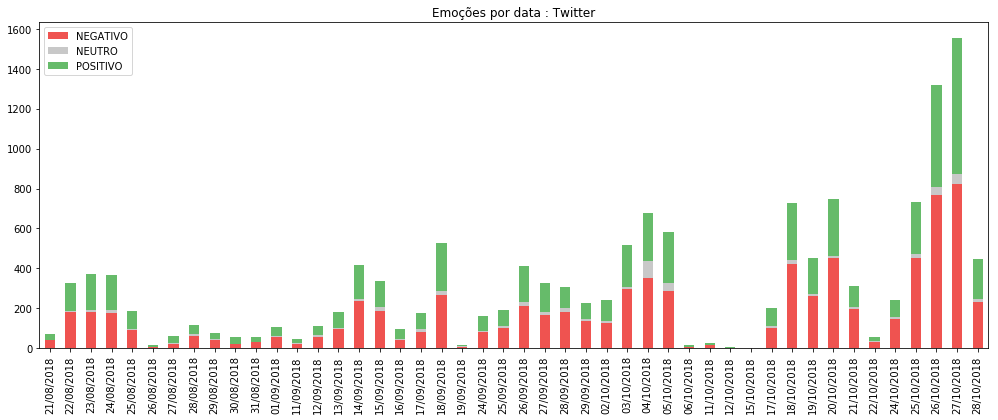

In [18]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,21/08/2018,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018
ALEGRIA,28,139,177,178,89,11,37,46
DESGOSTO,7,17,12,9,6,2,2,7
MEDO,0,0,1,0,0,0,0,0
NEUTRO,2,5,11,11,3,0,3,9
RAIVA,1,0,2,1,1,0,0,0
SURPRESA,0,1,0,1,1,0,0,0
TRISTEZA,32,165,168,169,86,5,20,57


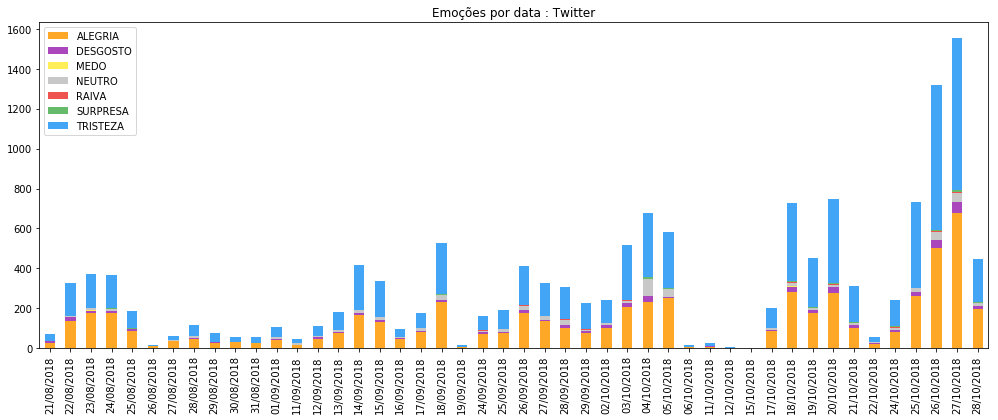

In [19]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Ciro Gomes

In [20]:
candidato_c = [modelo.candidate == 'Ciro Gomes']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [21]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Twitter:
--------------------
Total de Comentários  : 17217
Comentários Positivos : 3940
Comentários Negativos : 3903
Comentários Neutros   : 166

Porcentagem de comentários:
--------------------
Comentários Positivos : 22.88%
Comentários Negativos : 22.67%
Comentários Neutros   : 0.96%
Total                 : 46.52%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,3940,3903,166


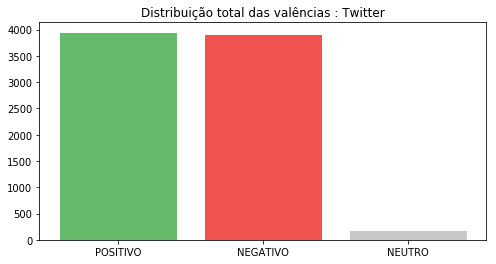

In [22]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,3914,26,3592,6,23,282,166


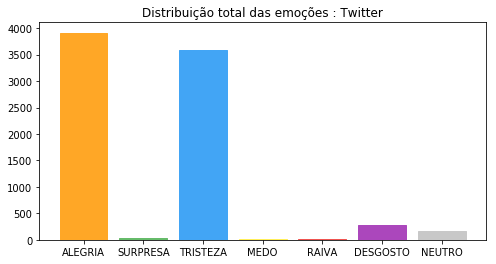

In [23]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,15/08/2018,16/08/2018,17/08/2018,18/08/2018,19/08/2018,20/08/2018,21/08/2018,22/08/2018
NEGATIVO,3,65,69,63,28,37,37,35
NEUTRO,0,5,5,0,1,3,1,3
POSITIVO,4,44,93,68,29,39,62,33


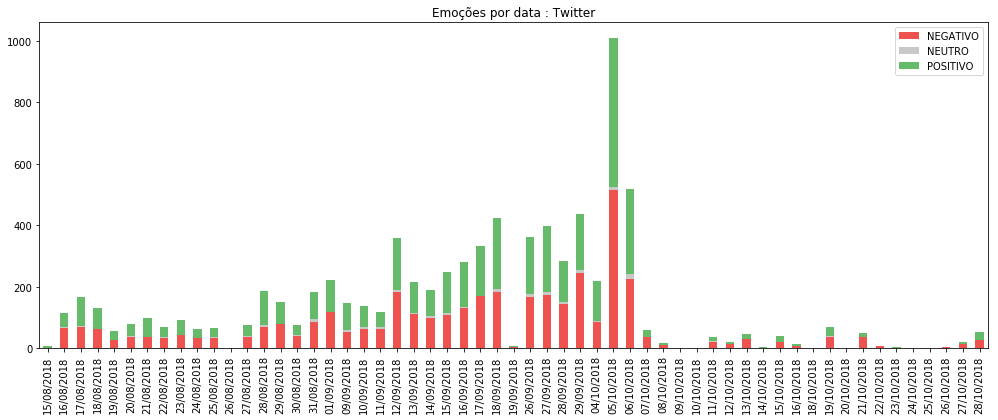

In [24]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,15/08/2018,16/08/2018,17/08/2018,18/08/2018,19/08/2018,20/08/2018,21/08/2018,22/08/2018
ALEGRIA,4,44,93,68,29,39,62,33
DESGOSTO,1,0,5,2,0,3,4,2
MEDO,0,0,0,0,0,0,1,0
NEUTRO,0,5,5,0,1,3,1,3
RAIVA,0,0,0,0,0,0,0,0
SURPRESA,0,0,0,0,0,0,0,0
TRISTEZA,2,65,64,61,28,34,32,33


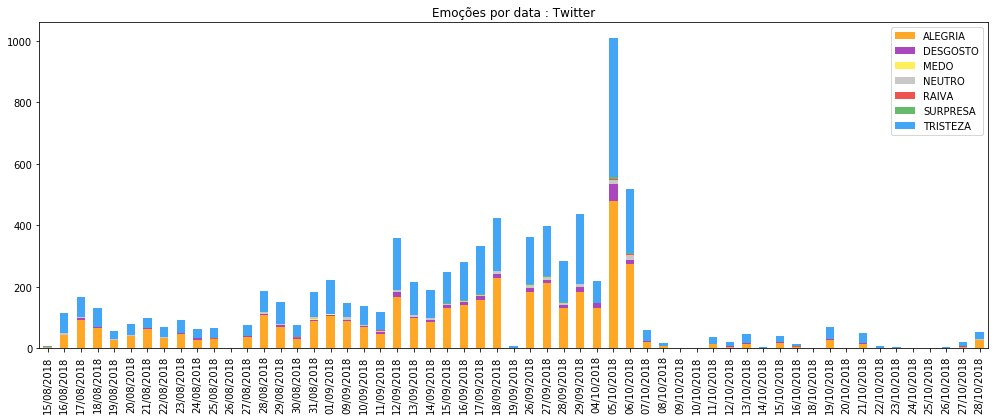

In [25]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Geraldo Alckmin

In [26]:
candidato_c = [modelo.candidate == 'Geraldo Alckmin']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [27]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Twitter:
--------------------
Total de Comentários  : 16324
Comentários Positivos : 2742
Comentários Negativos : 4686
Comentários Neutros   : 208

Porcentagem de comentários:
--------------------
Comentários Positivos : 16.8%
Comentários Negativos : 28.71%
Comentários Neutros   : 1.27%
Total                 : 46.78%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,2742,4686,208


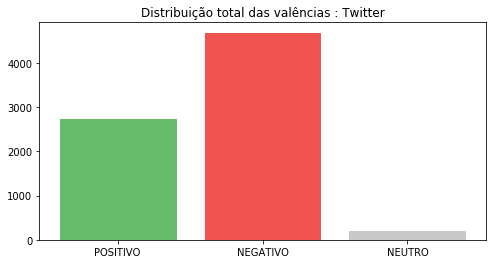

In [28]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,2699,43,4274,7,27,378,208


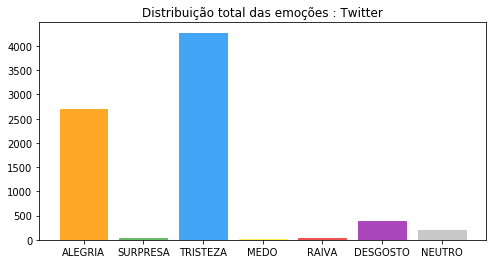

In [29]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,04/08/2018,05/08/2018,06/08/2018,07/08/2018,08/08/2018,09/08/2018,10/08/2018,11/08/2018
NEGATIVO,50,30,23,27,25,37,90,17
NEUTRO,1,0,1,1,0,2,6,0
POSITIVO,24,13,6,16,34,27,61,12


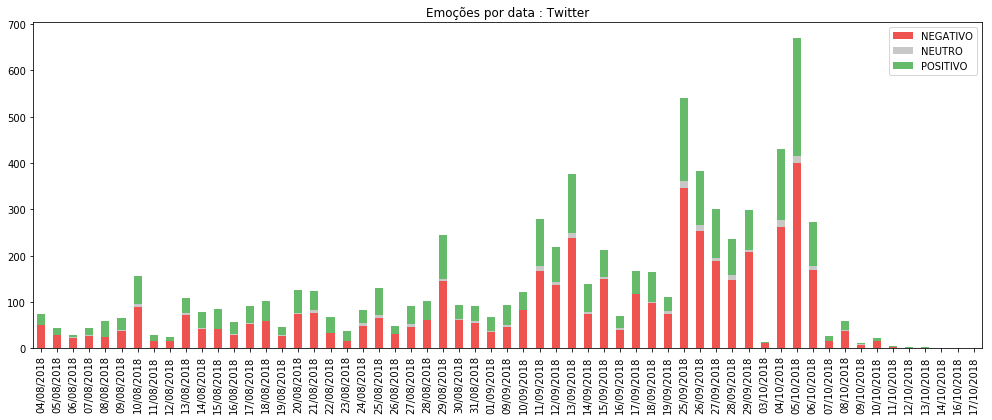

In [30]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,04/08/2018,05/08/2018,06/08/2018,07/08/2018,08/08/2018,09/08/2018,10/08/2018,11/08/2018
ALEGRIA,23,13,6,16,34,27,59,12
DESGOSTO,6,5,2,0,3,1,4,2
MEDO,0,0,0,0,1,0,2,0
NEUTRO,1,0,1,1,0,2,6,0
RAIVA,0,0,0,0,0,0,0,0
SURPRESA,1,0,0,0,0,0,2,0
TRISTEZA,44,25,21,27,21,36,84,15


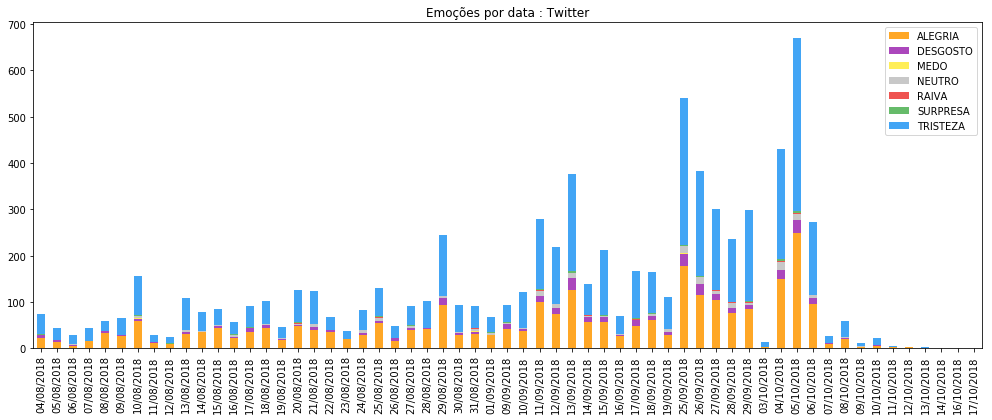

In [31]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Marina Silva

In [32]:
candidato_c = [modelo.candidate == 'Marina Silva']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [33]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Twitter:
--------------------
Total de Comentários  : 22069
Comentários Positivos : 4133
Comentários Negativos : 6029
Comentários Neutros   : 246

Porcentagem de comentários:
--------------------
Comentários Positivos : 18.73%
Comentários Negativos : 27.32%
Comentários Neutros   : 1.11%
Total                 : 47.16%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,4133,6029,246


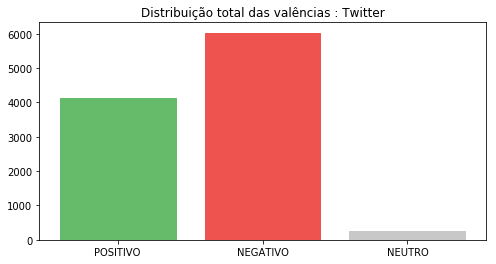

In [34]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,4076,57,5554,1,57,417,246


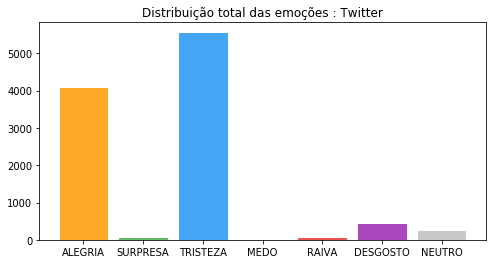

In [35]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,06/08/2018,07/08/2018,08/08/2018,09/08/2018,10/08/2018,11/08/2018,12/08/2018,13/08/2018
NEGATIVO,3,30,23,127,72,5,13,39
NEUTRO,0,2,1,5,6,0,0,4
POSITIVO,3,30,18,89,64,6,13,61


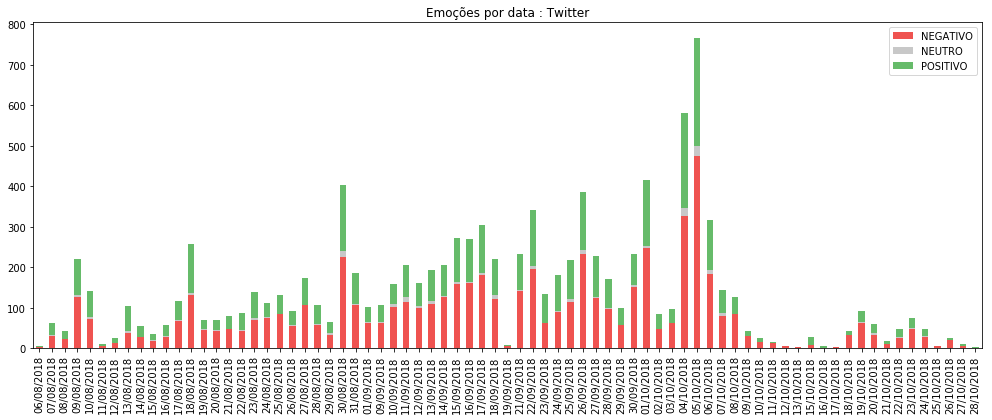

In [36]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,06/08/2018,07/08/2018,08/08/2018,09/08/2018,10/08/2018,11/08/2018,12/08/2018,13/08/2018
ALEGRIA,3,29,18,87,64,6,13,61
DESGOSTO,1,5,5,12,7,1,1,2
MEDO,0,0,0,0,0,0,0,0
NEUTRO,0,2,1,5,6,0,0,4
RAIVA,0,1,0,1,1,0,0,0
SURPRESA,0,1,0,2,0,0,0,0
TRISTEZA,2,24,18,114,64,4,12,37


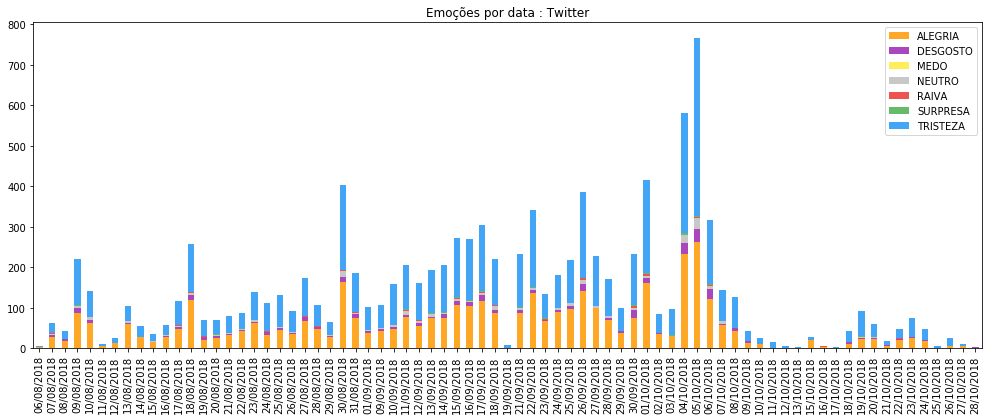

In [37]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)